In [1]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_SVN/BOSS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 157
	Class Healty: 82 samples
	Class Unhealty: 75 samples
Testing samples: 39
	Class Healty: 20 samples
	Class Unhealty: 19 samples


In [3]:
w = c.compute_survived_wavelengths_best_score_single()
c.plot_survived_df


Best accuracy for run 70 and iteration 101
Best accuracy = 0.9230769230769232


,Wavelengths,count
0,400.000,0.0
1,401.000,0.0
2,402.000,0.0
3,403.000,0.0
4,404.000,0.0
...,...,...
2096,2496.000,0.0
2097,2497.000,0.0
2098,2498.000,0.0
2099,2499.000,0.0


['1000.000', '1053.000', '1127.000', '1217.000', '1242.000', '1284.000', '1299.000', '1339.000', '1354.000', '1368.000', '1379.000', '1413.000', '1476.000', '1479.000', '1538.000', '1561.000', '1597.000', '1626.000', '1642.000', '1663.000', '1677.000', '1749.000', '1762.000', '1812.000', '1862.000', '1961.000', '1984.000', '1997.000', '2038.000', '2081.000', '2236.000', '2248.000', '2315.000', '2376.000', '2429.000', '2480.000', '445.000', '499.000', '563.000', '653.000', '668.000', '716.000', '729.000', '807.000', '904.000', '943.000']

Total combinations to test: 1

Combination 0: ['1000.000', '1053.000', '1127.000', '1217.000', '1242.000', '1284.000', '1299.000', '1339.000', '1354.000', '1368.000', '1379.000', '1413.000', '1476.000', '1479.000', '1538.000', '1561.000', '1597.000', '1626.000', '1642.000', '1663.000', '1677.000', '1749.000', '1762.000', '1812.000', '1862.000', '1961.000', '1984.000', '1997.000', '2038.000', '2081.000', '2236.000', '2248.000', '2315.000', '2376.000', '

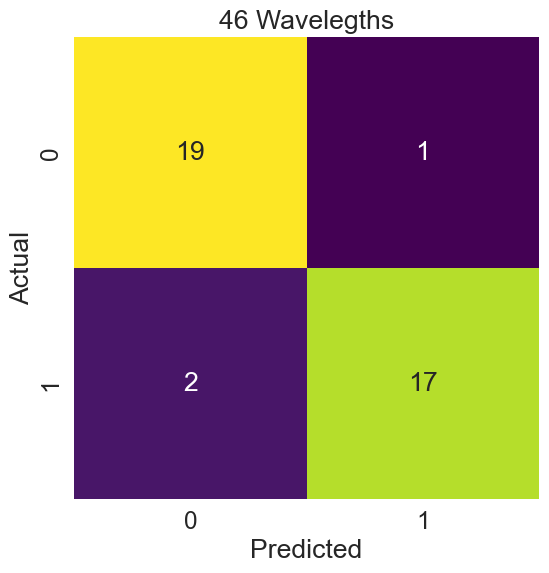

In [4]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=[w], learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)

In [5]:
# c.permutation_test(wavelengths=w)

In [6]:
import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = diff_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

Mismatched: [('20-Jun-2023', 'Healty', 40, 97), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 51)]
Corresponding Stress_weight values:
 Index([40, 20, 20], dtype='int64', name='Stress_weight')
